# EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy

# Importo el dataset de la hoja 'HECHOS' del archivo homicidios.xlsx y hago una analise estatistica y de valores faltantes

In [2]:
df_hechos = pd.read_excel('homicidios.xlsx', sheet_name= 'HECHOS')

In [3]:
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [4]:
df_hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


In [5]:
df_hechos.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

### Borro las columnas y lineas con valores faltantes que no agregan nada a la analisis

In [6]:
df_hechos.drop('Altura', axis=1, inplace= True)

In [7]:
df_hechos[df_hechos['Calle'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [8]:
df_hechos.drop(index= 119, axis= 0, inplace= True)

In [9]:
df_hechos[df_hechos['Calle'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [10]:
df_hechos.reset_index(drop= True, inplace= True)

In [11]:
df_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
691,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
692,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
693,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [12]:
df_hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,COMUNA
count,695.000000,695,695.000000,695.000000,695.000000,695.000000
mean,1.030216,2018-09-15 04:10:42.302158336,2018.191367,6.686331,15.933813,7.435971
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000
25%,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,9.000000,4.000000
50%,1.000000,2018-07-14 00:00:00,2018.000000,7.000000,16.000000,8.000000
75%,1.000000,2020-01-04 12:00:00,2020.000000,10.000000,23.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,15.000000
std,0.179519,NaN,1.682915,3.570133,8.645513,4.381139


### Normalizo las strings y nombres de las columnas. Además de sustituir los nombres y los valores 'Sd' para 'Sin Dato'

In [13]:
df_hechos = df_hechos.applymap(lambda x: x.title() if isinstance(x, str) else x)

C:\Users\anton\AppData\Local\Temp\ipykernel_20464\1108661590.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_hechos = df_hechos.applymap(lambda x: x.title() if isinstance(x, str) else x)


In [14]:
df_hechos.rename(columns= {'pos x': 'Longitud', 'pos y': 'Latitud'}, inplace= True)

In [15]:
df_hechos.rename(columns=lambda x: x.title(), inplace= True)

In [16]:
df_hechos.replace('Sd', 'Sin Dato', inplace= True)

### Borro columnas que no me agregan nada en la analisis

In [17]:
df_hechos.drop(['Xy (Caba)', 'Participantes','Hh', 'Cruce', 'Calle', 'Dirección Normalizada'], axis= 1, inplace= True)

In [18]:
df_hechos

,Id,N_Victimas,Fecha,Aaaa,Mm,Dd,Hora,Lugar_Del_Hecho,Tipo_De_Calle,Comuna,Longitud,Latitud,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,8,-58.47533969,-34.68757022,Moto,Auto
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,Av Gral Paz Y Av De Los Corrales,Gral Paz,9,-58.50877521,-34.66977709,Auto,Pasajeros
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,Av Entre Rios 2034,Avenida,1,-58.39040293,-34.63189362,Moto,Auto
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,Av Larrazabal Y Gral Villegas Conrado,Avenida,8,-58.46503904,-34.68092974,Moto,Sin Dato
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,Av San Juan Y Presidente Luis Saenz Peña,Avenida,1,-58.38718297,-34.62246630,Moto,Pasajeros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2021-0093,1,2021-12-13,2021,12,13,17:10:00,Av. Riestra Y Mom,Avenida,7,-58.43353773,-34.64561636,Moto,Auto
691,2021-0094,1,2021-12-20,2021,12,20,01:10:00,Au Dellepiane Y Lacarra,Autopista,9,-58.46739825,-34.65117757,Moto,Auto
692,2021-0095,1,2021-12-30,2021,12,30,00:43:00,Av. Gaona Y Terrada,Avenida,11,-58.47293407,-34.61984745,Moto,Cargas
693,2021-0096,1,2021-12-15,2021,12,15,10:30:00,Av. Eva Peron 4071,Avenida,9,-58.47066794,-34.65021673,Auto,Cargas


### Transformo los valores de las columnas 'Longitud' y 'Latitud' de string para numeric

In [19]:
df_hechos['Longitud'] = pd.to_numeric(df_hechos['Longitud'], errors='coerce')
df_hechos['Latitud'] = pd.to_numeric(df_hechos['Latitud'], errors='coerce')

### Cambio el valor 'Gral Paz' para 'Autopista', después de un consenso entre los estudiantes del Cohorte

In [20]:
df_hechos['Tipo_De_Calle'].replace(to_replace= 'Gral Paz', value= 'Autopista', inplace= True )

In [21]:
df_hechos.describe()

,N_Victimas,Fecha,Aaaa,Mm,Dd,Comuna,Longitud,Latitud
count,695.000000,695,695.000000,695.000000,695.000000,695.000000,684.000000,684.000000
mean,1.030216,2018-09-15 04:10:42.302158336,2018.191367,6.686331,15.933813,7.435971,-58.441545,-34.619632
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,-58.529942,-34.705250
25%,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,9.000000,4.000000,-58.476218,-34.643689
50%,1.000000,2018-07-14 00:00:00,2018.000000,7.000000,16.000000,8.000000,-58.444513,-34.622928
75%,1.000000,2020-01-04 12:00:00,2020.000000,10.000000,23.000000,11.000000,-58.401841,-34.596799
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,15.000000,-58.356082,-34.534654
std,0.179519,NaN,1.682915,3.570133,8.645513,4.381139,0.046144,0.035289


### Analiso los valores faltantes de las columnas 'Longitud' y 'Latitud' para ver como esto puede influir en la analisis final

In [22]:
df_hechos[df_hechos['Latitud'].isna() & df_hechos['Longitud'].isna()]

,Id,N_Victimas,Fecha,Aaaa,Mm,Dd,Hora,Lugar_Del_Hecho,Tipo_De_Calle,Comuna,Longitud,Latitud,Victima,Acusado
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,Autopista Lugones Pk 10000,Autopista,13,NaN,NaN,Moto,Sin Dato
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,Au Buenos Aires - La Plata Km. 4,Autopista,4,NaN,NaN,Moto,Cargas
138,2016-0174,1,2016-12-27,2016,12,27,00:00:00,Autopista 25 De Mayo,Autopista,0,NaN,NaN,Sin Dato,Sin Dato
175,2017-0042,1,2017-04-10,2017,4,10,09:00:00,Av. Leopoldo Lugones Pkm 6900,Autopista,14,NaN,NaN,Moto,Cargas
179,2017-0050,2,2017-04-28,2017,4,28,11:08:08,Au Perito Moreno Y Ramal Enlace Au1/Au6,Autopista,9,NaN,NaN,Moto,Cargas
180,2017-0051,1,2017-05-01,2017,5,1,03:47:47,Au Dellepiane 2400,Autopista,7,NaN,NaN,Auto,Auto
255,2017-0140,1,2017-11-19,2017,11,19,23:22:17,Au Arturo Frondizi Pkm 3100,Autopista,4,NaN,NaN,Moto,Pasajeros
312,2018-0039,1,2018-04-21,2018,4,21,22:15:00,Autopista Lugones Km 4.7,Autopista,14,NaN,NaN,Peaton,Auto
545,2020-0026,1,2020-05-17,2020,5,17,06:40:00,"Lugones, Leopoldo Av. Km 6,1",Autopista,14,NaN,NaN,Moto,Objeto Fijo
558,2020-0039,1,2020-09-01,2020,9,1,19:17:42,Murguiondo 2700,Calle,9,NaN,NaN,Peaton,Cargas


### Borro los valores faltantes de las columnas 'Longitud' y 'Latitud'

In [23]:
df_hechos.dropna(subset=['Longitud', 'Latitud'], inplace=True)

### Renombro columnas

In [24]:
df_hechos.rename(columns= {'Aaaa': 'Año', 'Mm': 'Mes', 'Dd':'Dia'}, inplace= True)

### Realizo analisis de como los valores 'Sin Dato' pueden influir en mi analisis final. Hago agrupamento de las columnas 'Victima' y 'Acusado' para graficar

In [25]:
df_hechos_tipo = df_hechos.groupby(['Victima', 'Acusado'])['N_Victimas'].sum().reset_index()

In [26]:
df_hechos_tipo

,Victima,Acusado,N_Victimas
0,Auto,Auto,32
1,Auto,Cargas,15
2,Auto,Multiple,3
3,Auto,Objeto Fijo,26
4,Auto,Otro,1
5,Auto,Pasajeros,10
6,Auto,Sin Dato,4
7,Bicicleta,Auto,8
8,Bicicleta,Cargas,10
9,Bicicleta,Multiple,1


In [27]:
filtro = ((df_hechos['Victima'] == 'Sin Dato') & (df_hechos['Acusado'] != 'Sin Dato')) | ((df_hechos['Victima'] != 'Sin Dato') & (df_hechos['Acusado'] == 'Sin Dato'))
df_filtrado = df_hechos[filtro]
df_filtrado

,Id,N_Victimas,Fecha,Año,Mes,Dia,Hora,Lugar_Del_Hecho,Tipo_De_Calle,Comuna,Longitud,Latitud,Victima,Acusado
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,Av Larrazabal Y Gral Villegas Conrado,Avenida,8,-58.465039,-34.680930,Moto,Sin Dato
32,2016-0045,1,2016-04-11,2016,4,11,10:25:00,Av Gral Paz Y Av Del Libertador,Autopista,13,-58.467435,-34.534769,Moto,Sin Dato
57,2016-0080,1,2016-06-18,2016,6,18,06:42:00,Av Gral Paz Y Av Rivadavia,Autopista,9,-58.529280,-34.639318,Auto,Sin Dato
83,2016-0110,1,2016-08-24,2016,8,24,20:21:00,Av Alberdi Y Carhue,Avenida,9,-58.512322,-34.659035,Peaton,Sin Dato
88,2016-0115,1,2016-09-02,2016,9,2,11:50:00,Arias Y Tronador,Calle,12,-58.489350,-34.549177,Sin Dato,Cargas
105,2016-0135,1,2016-10-24,2016,10,24,05:00:00,Av Figueroa Alcorta Y Pinedo,Avenida,14,-58.422602,-34.564037,Peaton,Sin Dato
112,2016-0143,1,2016-11-06,2016,11,6,04:41:00,Av 27 De Febrero Y Av Escalada,Avenida,8,-58.444513,-34.684759,Moto,Sin Dato
125,2016-0159,1,2016-12-04,2016,12,4,07:21:00,Av 27 De Febrero Y Av Escalada,Avenida,8,-58.444513,-34.684759,Auto,Sin Dato
159,2017-0025,1,2017-02-24,2017,2,24,17:05:00,Av. Fernandez De La Cruz Y Rivera Indarte,Avenida,7,-58.436144,-34.654246,Moto,Sin Dato
163,2017-0029,1,2017-03-07,2017,3,7,02:15:00,Mozart Y Tandil,Calle,9,-58.485013,-34.647425,Sin Dato,Auto


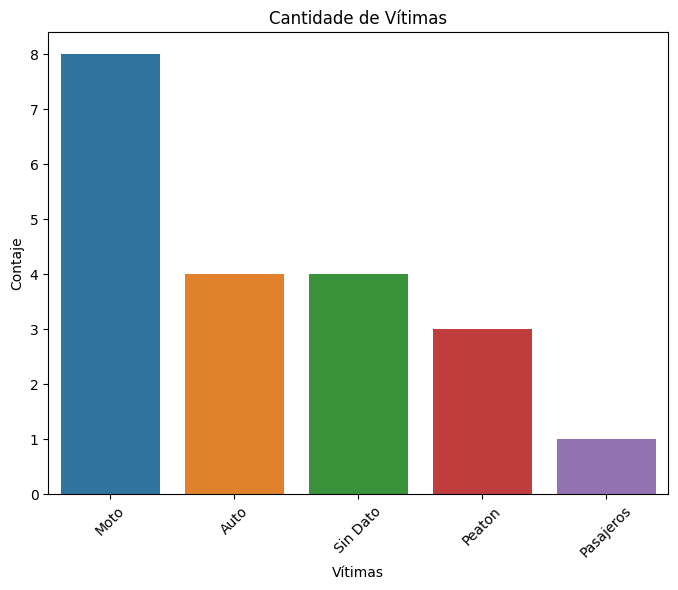

In [28]:
victimas_counts = df_filtrado['Victima'].value_counts()

# Plotar gráfico de barras para vítimas
plt.figure(figsize=(8, 6))
sns.barplot(x=victimas_counts.index, y=victimas_counts.values)
plt.title('Cantidade de Vítimas')
plt.xlabel('Vítimas')
plt.ylabel('Contaje')
plt.xticks(rotation=45)
plt.show()

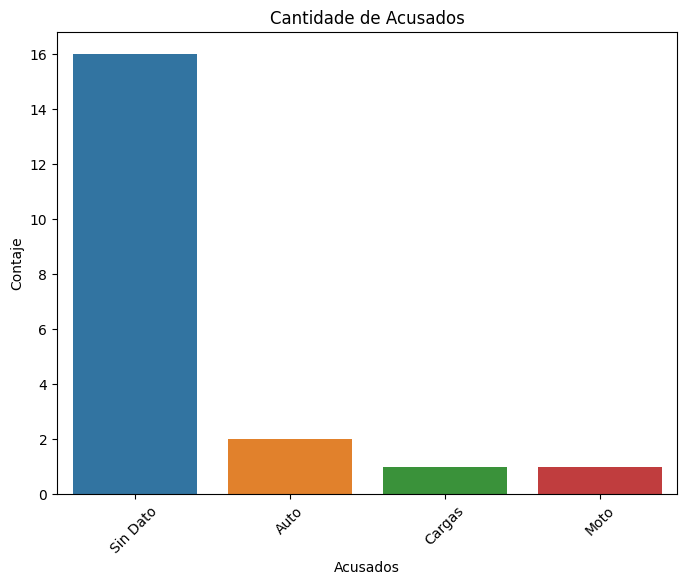

In [29]:
acusados_counts = df_filtrado['Acusado'].value_counts()

# Plotar gráfico de barras para acusados
plt.figure(figsize=(8, 6))
sns.barplot(x=acusados_counts.index, y=acusados_counts.values)
plt.title('Cantidade de Acusados')
plt.xlabel('Acusados')
plt.ylabel('Contaje')
plt.xticks(rotation=45)
plt.show()

### Después de analisar ambos graficos, decido borras las lineas con valores 'Sin Dato'

In [30]:
if 'Sin Dato' in df_hechos['Victima'].values or 'Sin Dato' in df_hechos['Acusado'].values:
    
    df_hechos = df_hechos[(df_hechos['Victima'] != 'Sin Dato') & (df_hechos['Acusado'] != 'Sin Dato')]

    df_hechos.reset_index(drop=True, inplace=True)


In [31]:
df_hechos.describe()

,N_Victimas,Fecha,Año,Mes,Dia,Comuna,Longitud,Latitud
count,660.000000,660,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,1.030303,2018-10-03 12:32:43.636363776,2018.240909,6.690909,16.046970,7.377273,-58.440640,-34.619382
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,1.000000,-58.529942,-34.705250
25%,1.000000,2017-05-08 12:00:00,2017.000000,4.000000,9.000000,4.000000,-58.475097,-34.642935
50%,1.000000,2018-08-01 12:00:00,2018.000000,7.000000,16.000000,8.000000,-58.443654,-34.622535
75%,1.000000,2020-01-21 18:00:00,2020.000000,10.000000,23.000000,11.000000,-58.400532,-34.596799
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,15.000000,-58.356082,-34.534654
std,0.180178,NaN,1.678524,3.584011,8.639952,4.403589,0.045878,0.034762


### Agrupo y grafico los tipos de calle por cantidad de vitima para analisar si no hay valores muy discrepantes 

In [32]:
df_hecho_calle = df_hechos.groupby('Tipo_De_Calle')['N_Victimas'].sum().reset_index()

In [33]:
df_hecho_calle

,Tipo_De_Calle,N_Victimas
0,Autopista,118
1,Avenida,431
2,Calle,131


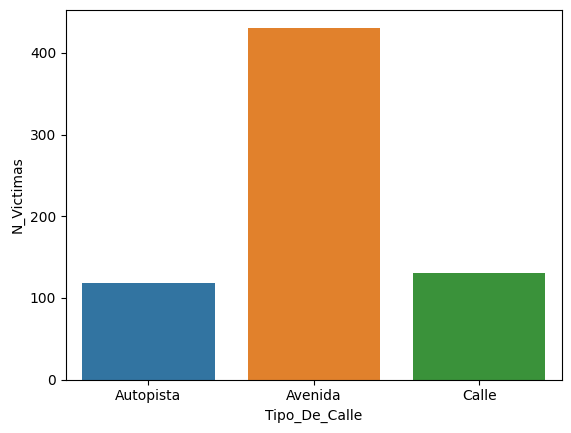

In [34]:
sns.barplot(df_hecho_calle, x= 'Tipo_De_Calle', y= 'N_Victimas')
plt.show()

### Agrupo y grafico los años por cantidad de vitima para analisar si no hay valores muy discrepantes 

In [35]:
df_hecho_anio = df_hechos.groupby('Año')['N_Victimas'].sum().reset_index()

In [36]:
df_hecho_anio

,Año,N_Victimas
0,2016,131
1,2017,128
2,2018,146
3,2019,101
4,2020,79
5,2021,95


c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

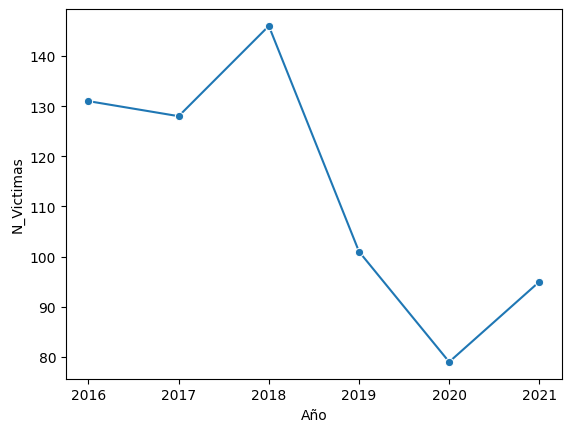

In [37]:
sns.lineplot(df_hecho_anio, x='Año', y ='N_Victimas', marker= 'o')
plt.show

### Agrupo y grafico los años y meses por cantidad de vitima para analisar si no hay valores muy discrepantes 

In [38]:
df_hecho_fecha = df_hechos.groupby(['Año', 'Mes'])['N_Victimas'].sum().reset_index()

In [39]:
df_hecho_fecha

,Año,Mes,N_Victimas
0,2016,1,7
1,2016,2,12
2,2016,3,13
3,2016,4,8
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


In [41]:
df_hecho_fecha.head()

,Año,Mes,N_Victimas
0,2016,1,7
1,2016,2,12
2,2016,3,13
3,2016,4,8
4,2016,5,7


c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

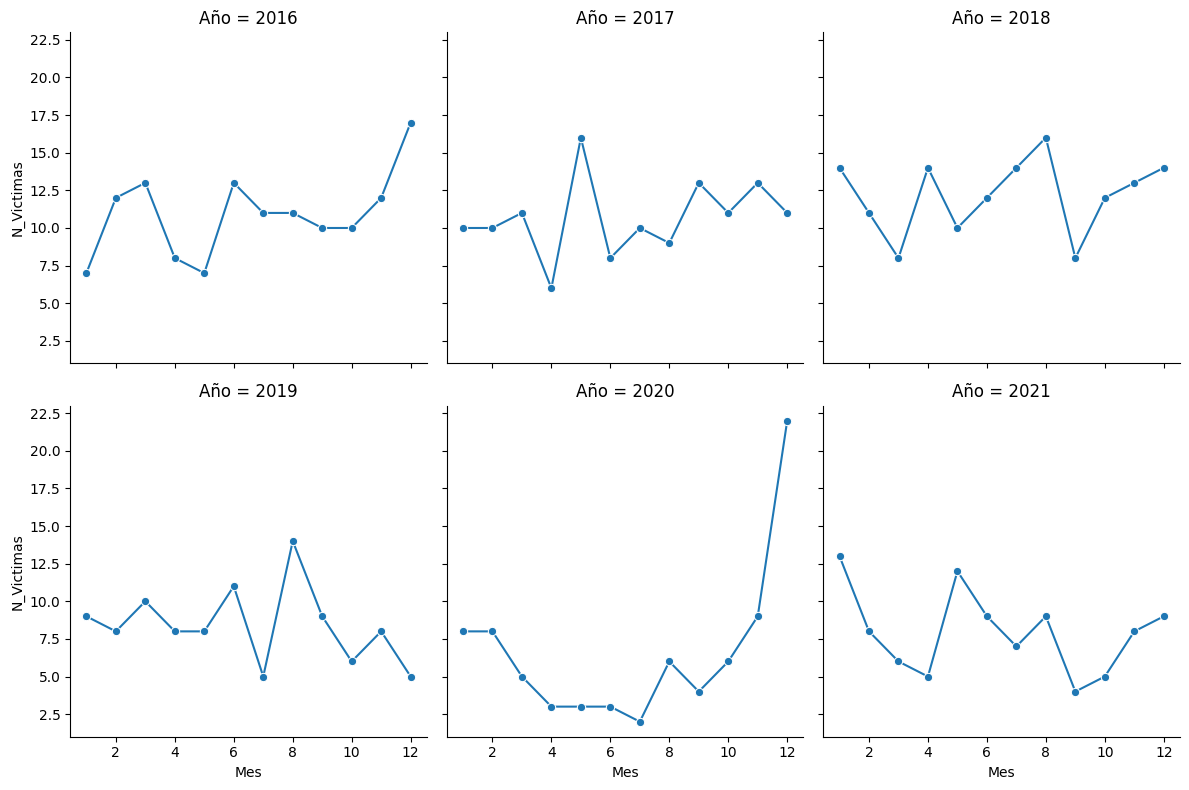

In [42]:
g = sns.FacetGrid(df_hecho_fecha, col="Año", col_wrap=3, height=4)

# Definir o gráfico de linhas para cada subplot
g.map(sns.lineplot, "Mes", "N_Victimas", errorbar=('ci', False), marker="o")

# Adicionar títulos aos subplots
for ax in g.axes.flat:
    ax.set_title(str(ax.get_title()))

# Ajustar espaçamento entre os subplots
g.tight_layout()

# Exibir o gráfico
plt.show()

### Agrupo y grafico las comunas por cantidad de vitima para analisar si no hay valores muy discrepantes 

In [45]:
df_hecho_comunas = df_hechos.groupby('Comuna')['N_Victimas'].sum().reset_index()

In [46]:
df_hecho_comunas

,Comuna,N_Victimas
0,1,91
1,2,25
2,3,46
3,4,75
4,5,22
5,6,22
6,7,58
7,8,63
8,9,64
9,10,30


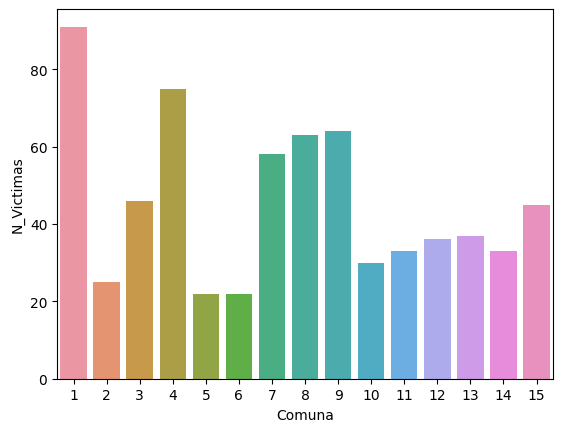

In [47]:
sns.barplot(df_hecho_comunas, x= 'Comuna', y= 'N_Victimas')
plt.show()

### Con la columna hora, creo una nueva columna que divida en dia en rangos

In [48]:
from datetime import time
def definir_rango_horario(hora):
    if hora >= time(6, 0, 0) and hora < time(12, 0, 0):
        return "6:00 - 12:00"
    elif hora >= time(12, 0, 0) and hora < time(19, 0, 0):
        return "12:00 - 19:00"
    elif hora >= time(19, 0, 0) or hora < time(0, 0, 0):
        return "19:00 - 0:00"
    else:
        return "0:00 - 6:00"

In [49]:
df_hechos[df_hechos["Hora"] == 'Sin Dato']

,Id,N_Victimas,Fecha,Año,Mes,Dia,Hora,Lugar_Del_Hecho,Tipo_De_Calle,Comuna,Longitud,Latitud,Victima,Acusado
486,2019-0103,1,2019-12-18,2019,12,18,Sin Dato,"Paz, Gral. Av. Y Griveo",Autopista,11,-58.521694,-34.594716,Moto,Moto


In [50]:
df_hechos = df_hechos[df_hechos["Hora"] != 'Sin Dato']

In [51]:
df_hechos["Hora"] = pd.to_datetime(df_hechos["Hora"], format="%H:%M:%S").dt.time


C:\Users\anton\AppData\Local\Temp\ipykernel_20464\3141612797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hechos["Hora"] = pd.to_datetime(df_hechos["Hora"], format="%H:%M:%S").dt.time


In [52]:
df_hechos["Rango_Horario"] = df_hechos["Hora"].apply(definir_rango_horario)

C:\Users\anton\AppData\Local\Temp\ipykernel_20464\219133789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hechos["Rango_Horario"] = df_hechos["Hora"].apply(definir_rango_horario)


In [53]:
df_hechos

,Id,N_Victimas,Fecha,Año,Mes,Dia,Hora,Lugar_Del_Hecho,Tipo_De_Calle,Comuna,Longitud,Latitud,Victima,Acusado,Rango_Horario
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,8,-58.475340,-34.687570,Moto,Auto,0:00 - 6:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,Av Gral Paz Y Av De Los Corrales,Autopista,9,-58.508775,-34.669777,Auto,Pasajeros,0:00 - 6:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,Av Entre Rios 2034,Avenida,1,-58.390403,-34.631894,Moto,Auto,6:00 - 12:00
3,2016-0005,1,2016-01-21,2016,1,21,05:20:00,Av San Juan Y Presidente Luis Saenz Peña,Avenida,1,-58.387183,-34.622466,Moto,Pasajeros,0:00 - 6:00
4,2016-0008,1,2016-01-24,2016,1,24,18:30:00,Av 27 De Febrero Y Av Escalada,Avenida,8,-58.444513,-34.684759,Moto,Objeto Fijo,12:00 - 19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2021-0093,1,2021-12-13,2021,12,13,17:10:00,Av. Riestra Y Mom,Avenida,7,-58.433538,-34.645616,Moto,Auto,12:00 - 19:00
656,2021-0094,1,2021-12-20,2021,12,20,01:10:00,Au Dellepiane Y Lacarra,Autopista,9,-58.467398,-34.651178,Moto,Auto,0:00 - 6:00
657,2021-0095,1,2021-12-30,2021,12,30,00:43:00,Av. Gaona Y Terrada,Avenida,11,-58.472934,-34.619847,Moto,Cargas,0:00 - 6:00
658,2021-0096,1,2021-12-15,2021,12,15,10:30:00,Av. Eva Peron 4071,Avenida,9,-58.470668,-34.650217,Auto,Cargas,6:00 - 12:00


### Agrupo y grafico los rangos horarios por cantidad de vitima para analisar si no hay valores muy discrepantes 

In [54]:
df_hechos_hora = df_hechos.groupby('Rango_Horario')['N_Victimas'].sum().reset_index()

In [55]:
df_hechos_hora

,Rango_Horario,N_Victimas
0,0:00 - 6:00,147
1,12:00 - 19:00,194
2,19:00 - 0:00,135
3,6:00 - 12:00,203


<Axes: xlabel='Rango_Horario', ylabel='N_Victimas'>

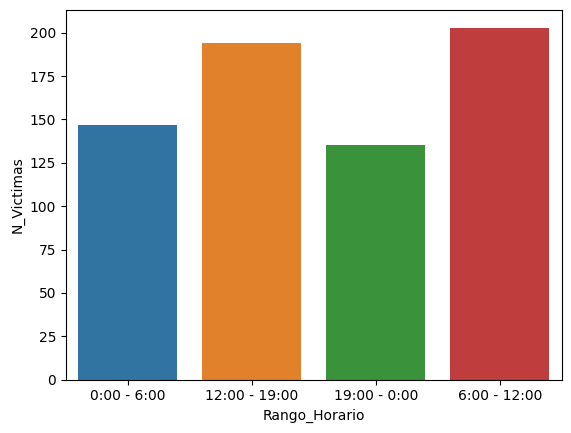

In [56]:
sns.barplot(df_hechos_hora, x= 'Rango_Horario', y='N_Victimas')

In [57]:
df_hechos.describe()

,N_Victimas,Fecha,Año,Mes,Dia,Comuna,Longitud,Latitud
count,659.000000,659,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000
mean,1.030349,2018-10-02 20:30:13.657056256,2018.239757,6.682853,16.044006,7.371775,-58.440517,-34.619420
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,1.000000,-58.529942,-34.705250
25%,1.000000,2017-05-08 00:00:00,2017.000000,4.000000,9.000000,4.000000,-58.474817,-34.642949
50%,1.000000,2018-08-01 00:00:00,2018.000000,7.000000,16.000000,8.000000,-58.443621,-34.622603
75%,1.000000,2020-01-23 12:00:00,2020.000000,10.000000,23.000000,11.000000,-58.400496,-34.596991
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,15.000000,-58.356082,-34.534654
std,0.180311,NaN,1.679538,3.580748,8.646179,4.404666,0.045804,0.034775


# Importo el dataset de la hoja 'VICTIMAS' del archivo homicidios.xlsx y hago una analise estatistica y de valores faltantes

In [61]:
df_victimas = pd.read_excel('homicidios.xlsx', sheet_name= 'VICTIMAS')

In [62]:
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


### Mantengo solo las lineas en que el ID_hecho aparezca en ID del dataset df_hechos

In [63]:
df_victimas = df_victimas[df_victimas['ID_hecho'].isin(df_hechos['Id'])]

In [64]:
df_victimas.reset_index(drop= True, inplace= True)

In [65]:
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
4,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00


### Analiso los valores duplicados

In [66]:
duplicados = df_victimas[df_victimas['ID_hecho'].duplicated()]

In [67]:
duplicados

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
90,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
148,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26 00:00:00
157,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
158,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00
160,2017-0036,2017-03-29,2017,3,29,CONDUCTOR,MOTO,MASCULINO,20,2017-03-29 00:00:00
213,2017-0108,2017-09-02,2017,9,2,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,10,2017-09-02 00:00:00
218,2017-0112,2017-09-10,2017,9,10,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,SD,2017-09-13 00:00:00
229,2017-0126,2017-10-14,2017,10,14,CONDUCTOR,AUTO,MASCULINO,36,2017-10-14 00:00:00
252,2017-0153,2017-12-11,2017,12,11,CONDUCTOR,MOTO,MASCULINO,30,2017-12-12 00:00:00


### Analiso los valores 'SD'

In [68]:
df_victimas[df_victimas.values == 'SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
15,2016-0022,2016-02-21,2016,2,21,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,41,SD
18,2016-0027,2016-02-28,2016,2,28,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,34,SD
21,2016-0031,2016-03-08,2016,3,8,CONDUCTOR,MOTO,MASCULINO,21,SD
29,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
...,...,...,...,...,...,...,...,...,...,...
543,2020-0040,2020-09-12,2020,9,12,CONDUCTOR,AUTO,MASCULINO,SD,2020-09-12 00:00:00
595,2021-0012,2021-01-29,2021,1,29,PEATON,PEATON,MASCULINO,SD,2021-01-29 00:00:00
603,2021-0020,2021-02-21,2021,2,21,PEATON,PEATON,FEMENINO,SD,2021-02-21 00:00:00
609,2021-0028,2021-03-29,2021,3,29,PEATON,PEATON,MASCULINO,SD,2021-03-29 00:00:00


### Transformo la columna 'FECHA_FALLECIMIENTO' en tipo datetime

In [69]:
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')

C:\Users\anton\AppData\Local\Temp\ipykernel_20464\3136448699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')


### Veo los valores NaT

In [70]:
df_victimas[df_victimas['FECHA_FALLECIMIENTO'].isna()]

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
15,2016-0022,2016-02-21,2016,2,21,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,41,NaT
18,2016-0027,2016-02-28,2016,2,28,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,34,NaT
21,2016-0031,2016-03-08,2016,3,8,CONDUCTOR,MOTO,MASCULINO,21,NaT
33,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,NaT
42,2016-0064,2016-05-14,2016,5,14,PEATON,PEATON,MASCULINO,20,NaT
44,2016-0067,2016-05-21,2016,5,21,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,30,NaT
45,2016-0068,2016-05-22,2016,5,22,CONDUCTOR,MOTO,MASCULINO,58,NaT
47,2016-0073,2016-06-11,2016,6,11,CONDUCTOR,MOTO,MASCULINO,23,NaT
48,2016-0074,2016-06-12,2016,6,12,CONDUCTOR,AUTO,MASCULINO,60,NaT
51,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,NaT


### Transformo los valores de la columna 'EDAD' para numeric

In [71]:
df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], errors="coerce" )

C:\Users\anton\AppData\Local\Temp\ipykernel_20464\3825502305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], errors="coerce" )


### Normalizo strings, nombres de columna y renombro algunas columnas

In [72]:
df_victimas = df_victimas.applymap(lambda x: x.title() if isinstance(x, str) else x)
df_victimas.rename(columns=lambda x: x.title(), inplace= True)
df_victimas.rename(columns= {'Id_Hecho':'Id','Aaaa': 'Año', 'Mm': 'Mes', 'Dd':'Dia'}, inplace= True)

C:\Users\anton\AppData\Local\Temp\ipykernel_20464\3513176845.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_victimas = df_victimas.applymap(lambda x: x.title() if isinstance(x, str) else x)


In [74]:
df_victimas

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento
0,2016-0001,2016-01-01,2016,1,1,Conductor,Moto,Masculino,19.0,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,Conductor,Auto,Masculino,70.0,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,Conductor,Moto,Masculino,30.0,2016-01-03
3,2016-0005,2016-01-21,2016,1,21,Conductor,Moto,Masculino,29.0,2016-02-01
4,2016-0008,2016-01-24,2016,1,24,Conductor,Moto,Masculino,30.0,2016-01-24
...,...,...,...,...,...,...,...,...,...,...
674,2021-0092,2021-12-12,2021,12,12,Peaton,Peaton,Femenino,50.0,2021-12-12
675,2021-0093,2021-12-13,2021,12,13,Pasajero Acompañante,Moto,Femenino,18.0,2021-12-18
676,2021-0094,2021-12-20,2021,12,20,Pasajero Acompañante,Moto,Femenino,43.0,2021-12-20
677,2021-0095,2021-12-30,2021,12,30,Conductor,Moto,Masculino,27.0,2022-01-02


### Agrupo columna 'Rol' para visualizar cantidad de valores 'Sd'

In [75]:
df_victimas_rol = df_victimas.groupby(['Rol']).size().reset_index(name='Conteo')

In [76]:
df_victimas_rol

,Rol,Conteo
0,Ciclista,29
1,Conductor,311
2,Pasajero Acompañante,76
3,Peaton,261
4,Sd,2


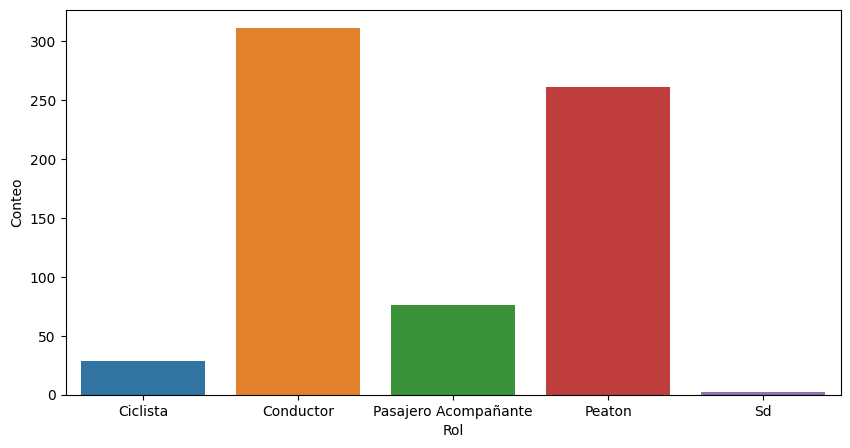

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(df_victimas_rol, x='Rol', y='Conteo')
plt.show()

In [78]:
df_victimas[df_victimas.values == 'Sd']

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento
58,2016-0085,2016-06-29,2016,6,29,Sd,Moto,Masculino,NaN,NaT
124,2016-0171,2016-12-25,2016,12,25,Conductor,Moto,Sd,NaN,NaT
362,2018-0100,2018-09-20,2018,9,20,Sd,Moto,Femenino,33.0,2018-09-20


### Borro valores 'Sd' de la columna 'Rol

In [79]:
df_victimas = (df_victimas[df_victimas['Rol'] != 'Sd'])

In [80]:
df_victimas.reset_index(drop= True, inplace= True)

### Hago un conteo los valores faltantes, pero antes de borrarlos tengo que verificar se los valores con más de 1 victimas en el df_hechos, están bien figurados en el df_victimas y si al borrar no se vá afectar, caso si tengo que borrar ambos valores para que no dañe la visualización y los datos se queden normalizados

In [81]:
df_victimas.isna().sum()

Id                      0
Fecha                   0
Año                     0
Mes                     0
Dia                     0
Rol                     0
Victima                 0
Sexo                    0
Edad                   42
Fecha_Fallecimiento    51
dtype: int64

In [82]:
df_victimas_edadNull = df_victimas[df_victimas.Edad.isna()]

In [83]:
df_hechos_max = df_hechos[df_hechos['N_Victimas'] > 1]

In [84]:
df_merge = df_victimas_edadNull[df_victimas_edadNull['Id'].isin(df_hechos_max['Id'])]

In [85]:
df_merge

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento
29,2016-0041,2016-03-29,2016,3,29,Pasajero Acompañante,Moto,Masculino,NaN,2016-03-30
158,2017-0036,2017-03-29,2017,3,29,Pasajero Acompañante,Moto,Femenino,NaN,2017-03-29
217,2017-0112,2017-09-10,2017,9,10,Pasajero Acompañante,Auto,Masculino,NaN,2017-09-13
250,2017-0153,2017-12-11,2017,12,11,Pasajero Acompañante,Moto,Masculino,NaN,2017-12-12
412,2019-0010,2019-02-02,2019,2,2,Peaton,Peaton,Masculino,NaN,2019-02-02


In [86]:
lista = df_merge.Id.to_list()

In [87]:
df_hechos_max[df_hechos_max['Id'].isin(lista)]

,Id,N_Victimas,Fecha,Año,Mes,Dia,Hora,Lugar_Del_Hecho,Tipo_De_Calle,Comuna,Longitud,Latitud,Victima,Acusado,Rango_Horario
28,2016-0041,2,2016-03-29,2016,3,29,11:00:00,Av Directorio Y Rivera Indarte,Avenida,7,-58.460766,-34.633504,Moto,Cargas,6:00 - 12:00
154,2017-0036,2,2017-03-29,2017,3,29,18:00:00,Curupayti Y Colectora Av. Gral. Paz,Autopista,12,-58.514523,-34.581598,Moto,Pasajeros,12:00 - 19:00
210,2017-0112,2,2017-09-10,2017,9,10,09:32:17,Au 25 De Mayo Y Av. Varela,Autopista,7,-58.458074,-34.639974,Auto,Objeto Fijo,6:00 - 12:00
242,2017-0153,2,2017-12-11,2017,12,11,02:00:00,Rosario Y Av. La Plata,Avenida,6,-58.428553,-34.618294,Moto,Pasajeros,0:00 - 6:00
398,2019-0010,2,2019-02-02,2019,2,2,07:50:00,Del Libertador Av. 4100,Avenida,14,-58.426685,-34.569615,Peaton,Auto,6:00 - 12:00


In [88]:
df_victimas[df_victimas['Id'].isin(lista)]

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento
28,2016-0041,2016-03-29,2016,3,29,Conductor,Moto,Masculino,54.0,2016-03-29
29,2016-0041,2016-03-29,2016,3,29,Pasajero Acompañante,Moto,Masculino,NaN,2016-03-30
158,2017-0036,2017-03-29,2017,3,29,Pasajero Acompañante,Moto,Femenino,NaN,2017-03-29
159,2017-0036,2017-03-29,2017,3,29,Conductor,Moto,Masculino,20.0,2017-03-29
216,2017-0112,2017-09-10,2017,9,10,Pasajero Acompañante,Auto,Masculino,1.0,NaT
217,2017-0112,2017-09-10,2017,9,10,Pasajero Acompañante,Auto,Masculino,NaN,2017-09-13
250,2017-0153,2017-12-11,2017,12,11,Pasajero Acompañante,Moto,Masculino,NaN,2017-12-12
251,2017-0153,2017-12-11,2017,12,11,Conductor,Moto,Masculino,30.0,2017-12-12
412,2019-0010,2019-02-02,2019,2,2,Peaton,Peaton,Masculino,NaN,2019-02-02
413,2019-0010,2019-02-02,2019,2,2,Peaton,Peaton,Masculino,59.0,2019-02-02


In [89]:
df_victimas.drop(df_victimas[df_victimas['Id'].isin(lista)].index, inplace= True)

C:\Users\anton\AppData\Local\Temp\ipykernel_20464\1253257408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victimas.drop(df_victimas[df_victimas['Id'].isin(lista)].index, inplace= True)


In [90]:
df_victimas.reset_index(drop= True, inplace= True)

In [91]:
df_hechos[df_hechos['Id'].isin(lista)]

,Id,N_Victimas,Fecha,Año,Mes,Dia,Hora,Lugar_Del_Hecho,Tipo_De_Calle,Comuna,Longitud,Latitud,Victima,Acusado,Rango_Horario
28,2016-0041,2,2016-03-29,2016,3,29,11:00:00,Av Directorio Y Rivera Indarte,Avenida,7,-58.460766,-34.633504,Moto,Cargas,6:00 - 12:00
154,2017-0036,2,2017-03-29,2017,3,29,18:00:00,Curupayti Y Colectora Av. Gral. Paz,Autopista,12,-58.514523,-34.581598,Moto,Pasajeros,12:00 - 19:00
210,2017-0112,2,2017-09-10,2017,9,10,09:32:17,Au 25 De Mayo Y Av. Varela,Autopista,7,-58.458074,-34.639974,Auto,Objeto Fijo,6:00 - 12:00
242,2017-0153,2,2017-12-11,2017,12,11,02:00:00,Rosario Y Av. La Plata,Avenida,6,-58.428553,-34.618294,Moto,Pasajeros,0:00 - 6:00
398,2019-0010,2,2019-02-02,2019,2,2,07:50:00,Del Libertador Av. 4100,Avenida,14,-58.426685,-34.569615,Peaton,Auto,6:00 - 12:00


In [92]:
df_hechos.drop(df_hechos[df_hechos['Id'].isin(lista)].index, inplace= True)

C:\Users\anton\AppData\Local\Temp\ipykernel_20464\297163379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hechos.drop(df_hechos[df_hechos['Id'].isin(lista)].index, inplace= True)


In [93]:
df_hechos.reset_index(drop= True, inplace= True)

In [94]:
df_victimas.dropna(inplace=True)

C:\Users\anton\AppData\Local\Temp\ipykernel_20464\1384559948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victimas.dropna(inplace=True)


In [95]:
df_victimas.reset_index(drop= True)

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento
0,2016-0001,2016-01-01,2016,1,1,Conductor,Moto,Masculino,19.0,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,Conductor,Auto,Masculino,70.0,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,Conductor,Moto,Masculino,30.0,2016-01-03
3,2016-0005,2016-01-21,2016,1,21,Conductor,Moto,Masculino,29.0,2016-02-01
4,2016-0008,2016-01-24,2016,1,24,Conductor,Moto,Masculino,30.0,2016-01-24
...,...,...,...,...,...,...,...,...,...,...
581,2021-0092,2021-12-12,2021,12,12,Peaton,Peaton,Femenino,50.0,2021-12-12
582,2021-0093,2021-12-13,2021,12,13,Pasajero Acompañante,Moto,Femenino,18.0,2021-12-18
583,2021-0094,2021-12-20,2021,12,20,Pasajero Acompañante,Moto,Femenino,43.0,2021-12-20
584,2021-0095,2021-12-30,2021,12,30,Conductor,Moto,Masculino,27.0,2022-01-02


### Hago una columna con Rango etario de las vitimas

In [96]:
bins = [0, 18, 30, 50, float('inf')] 
labels = ['<18', '18-30', '30-50', '50+']  

df_victimas['Rango_Etario'] = pd.cut(df_victimas['Edad'], bins=bins, labels=labels, right=False)

C:\Users\anton\AppData\Local\Temp\ipykernel_20464\1894329276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victimas['Rango_Etario'] = pd.cut(df_victimas['Edad'], bins=bins, labels=labels, right=False)


In [97]:
df_victimas

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento,Rango_Etario
0,2016-0001,2016-01-01,2016,1,1,Conductor,Moto,Masculino,19.0,2016-01-01,18-30
1,2016-0002,2016-01-02,2016,1,2,Conductor,Auto,Masculino,70.0,2016-01-02,50+
2,2016-0003,2016-01-03,2016,1,3,Conductor,Moto,Masculino,30.0,2016-01-03,30-50
3,2016-0005,2016-01-21,2016,1,21,Conductor,Moto,Masculino,29.0,2016-02-01,18-30
4,2016-0008,2016-01-24,2016,1,24,Conductor,Moto,Masculino,30.0,2016-01-24,30-50
...,...,...,...,...,...,...,...,...,...,...,...
662,2021-0092,2021-12-12,2021,12,12,Peaton,Peaton,Femenino,50.0,2021-12-12,50+
663,2021-0093,2021-12-13,2021,12,13,Pasajero Acompañante,Moto,Femenino,18.0,2021-12-18,18-30
664,2021-0094,2021-12-20,2021,12,20,Pasajero Acompañante,Moto,Femenino,43.0,2021-12-20,30-50
665,2021-0095,2021-12-30,2021,12,30,Conductor,Moto,Masculino,27.0,2022-01-02,18-30


In [98]:
df_victimas['Edad'] = df_victimas['Edad'].astype(int)

C:\Users\anton\AppData\Local\Temp\ipykernel_20464\3511338127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victimas['Edad'] = df_victimas['Edad'].astype(int)


In [99]:
df_victimas

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento,Rango_Etario
0,2016-0001,2016-01-01,2016,1,1,Conductor,Moto,Masculino,19,2016-01-01,18-30
1,2016-0002,2016-01-02,2016,1,2,Conductor,Auto,Masculino,70,2016-01-02,50+
2,2016-0003,2016-01-03,2016,1,3,Conductor,Moto,Masculino,30,2016-01-03,30-50
3,2016-0005,2016-01-21,2016,1,21,Conductor,Moto,Masculino,29,2016-02-01,18-30
4,2016-0008,2016-01-24,2016,1,24,Conductor,Moto,Masculino,30,2016-01-24,30-50
...,...,...,...,...,...,...,...,...,...,...,...
662,2021-0092,2021-12-12,2021,12,12,Peaton,Peaton,Femenino,50,2021-12-12,50+
663,2021-0093,2021-12-13,2021,12,13,Pasajero Acompañante,Moto,Femenino,18,2021-12-18,18-30
664,2021-0094,2021-12-20,2021,12,20,Pasajero Acompañante,Moto,Femenino,43,2021-12-20,30-50
665,2021-0095,2021-12-30,2021,12,30,Conductor,Moto,Masculino,27,2022-01-02,18-30


In [100]:
df_victimas.isna().sum()

Id                     0
Fecha                  0
Año                    0
Mes                    0
Dia                    0
Rol                    0
Victima                0
Sexo                   0
Edad                   0
Fecha_Fallecimiento    0
Rango_Etario           0
dtype: int64

In [101]:
df_hechos.reset_index(inplace=True)

### Verifico si todos los Id se apresentan en ambos Dataframes

In [102]:
df_hechos = df_hechos[df_hechos['Id'].isin(df_victimas['Id'])]

In [103]:
df_hechos.reset_index(drop= True, inplace= True)

In [104]:
df_hechos.drop('index', axis= 1, inplace = True)

C:\Users\anton\AppData\Local\Temp\ipykernel_20464\1889091266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hechos.drop('index', axis= 1, inplace = True)


In [105]:
df_hechos

,Id,N_Victimas,Fecha,Año,Mes,Dia,Hora,Lugar_Del_Hecho,Tipo_De_Calle,Comuna,Longitud,Latitud,Victima,Acusado,Rango_Horario
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,8,-58.475340,-34.687570,Moto,Auto,0:00 - 6:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,Av Gral Paz Y Av De Los Corrales,Autopista,9,-58.508775,-34.669777,Auto,Pasajeros,0:00 - 6:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,Av Entre Rios 2034,Avenida,1,-58.390403,-34.631894,Moto,Auto,6:00 - 12:00
3,2016-0005,1,2016-01-21,2016,1,21,05:20:00,Av San Juan Y Presidente Luis Saenz Peña,Avenida,1,-58.387183,-34.622466,Moto,Pasajeros,0:00 - 6:00
4,2016-0008,1,2016-01-24,2016,1,24,18:30:00,Av 27 De Febrero Y Av Escalada,Avenida,8,-58.444513,-34.684759,Moto,Objeto Fijo,12:00 - 19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,2021-0093,1,2021-12-13,2021,12,13,17:10:00,Av. Riestra Y Mom,Avenida,7,-58.433538,-34.645616,Moto,Auto,12:00 - 19:00
569,2021-0094,1,2021-12-20,2021,12,20,01:10:00,Au Dellepiane Y Lacarra,Autopista,9,-58.467398,-34.651178,Moto,Auto,0:00 - 6:00
570,2021-0095,1,2021-12-30,2021,12,30,00:43:00,Av. Gaona Y Terrada,Avenida,11,-58.472934,-34.619847,Moto,Cargas,0:00 - 6:00
571,2021-0096,1,2021-12-15,2021,12,15,10:30:00,Av. Eva Peron 4071,Avenida,9,-58.470668,-34.650217,Auto,Cargas,6:00 - 12:00


Guardo ambos dataframes en diferentes Archivos xlsx

In [106]:
df_hechos.to_excel('Hechos_Homicidios.xlsx', index= False)

In [107]:
df_victimas.to_excel('Victimas_Homicidios.xlsx', index= False)